# Extension of Theory to Corepression and Activation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


# Custom written utilities.
import mwc_induction_utils as mwc
mwc.set_plotting_style()

%matplotlib notebook

/Users/gchure/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##  Case I: Corepression

Consider a repressor in which it is predominantly in the **active** state when **bound** with a inducer. The fold-change becomes
$$
\text{fold-change} \approx \left(1 + { e^{-\beta\Delta\varepsilon_{AI}}\left(1 + {c \over K_A}\right)^2 \over e^{-\beta\Delta\varepsilon_{AI}}\left(1 + {c \over K_A}\right)^2 + \left(1 + {c \over K_I}\right)^2} {R \over N_{NS}}e^{-\beta\Delta\varepsilon_{RA}}\right)^{-1}\,.
$$

Now let's look at some plots of the behavior of this thing. 

In [2]:
def corepression(c, R, ep_ra, ep_ai, k_a, k_i, n_ns=4.6E6):
    mwc_term = (np.exp(-ep_ai) * (1 + c / k_a)**2 / (np.exp(-ep_ai) *\
                (1 + c / k_a)**2 + (1 + c / k_i)**2))
    repression = (1 + mwc_term * (R / n_ns) * np.exp(-ep_ra))
    return 1 / repression

<IPython.core.display.Javascript object>


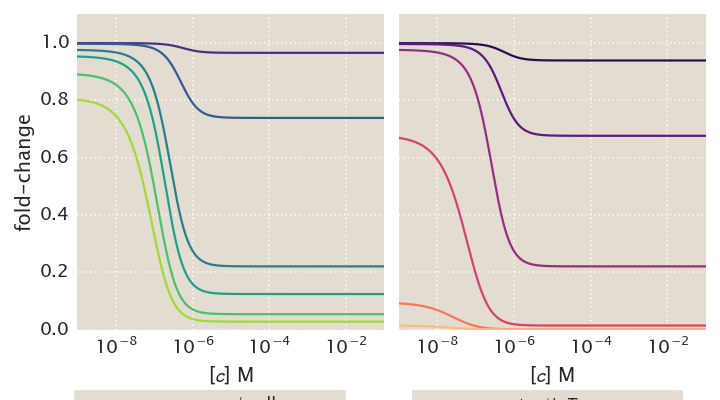

In [3]:
# Define parameters.
c_range = np.logspace(-9, -1, 500)
R_range = [1, 10, 100, 200, 500, 1000]
ep_ra_range = [-8, -10, -12, -15, -18, -20]
ep_ai = 5
k_a = 50E-9
k_i = 200E-6

# Set the colors
viridis = sns.color_palette('viridis', n_colors=6)
magma = sns.color_palette('magma', n_colors=6)

# Instantiate the figure
fig, ax = plt.subplots(1, 2, figsize=(9,5), sharey=True)

# Compute the corepression with varying R
for i, R in enumerate(R_range):
    fold_change = corepression(c_range, R, ep_ra_range[2], ep_ai, k_a, k_i)
    ax[0].plot(c_range, fold_change, '-', color=viridis[i], label=R)
    
a0_leg = ax[0].legend(bbox_to_anchor=(0.90, -.17), title='repressors / cell', ncol=3)
a0_leg.get_title().set_fontsize(15)
# Compute the corepression with varying ep_ra
for i, ep in enumerate(ep_ra_range):
    fold_change = corepression(c_range, R_range[2], ep, ep_ai, k_a, k_i)
    ax[1].plot(c_range, fold_change, '-', color=magma[i], label=ep)
    
a1_leg = ax[1].legend(bbox_to_anchor=(0.95, -.17),
                      title=r'$\Delta\varepsilon_{R}\,(k_BT)$', ncol=3)

a1_leg.get_title().set_fontsize(15)

ax[0].set_xlabel('[$c$] M')
ax[1].set_xlabel('[$c$] M')
ax[0].set_ylabel('fold-change')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylim([0, 1.1])
ax[1].set_ylim([0, 1.1])
ax[0].set_xticks([1E-8, 1E-6, 1E-4, 1E-2])
ax[1].set_xticks([1E-8, 1E-6, 1E-4, 1E-2])
ax[0].tick_params(labelsize=17)
ax[1].tick_params(labelsize=17)
plt.tight_layout()
plt.savefig('/Users/gchure/Dropbox/mwc_induction/Figures/supplementary_figures/corepression_predictions.pdf', bbox_inches='tight')


## Case II: Simple activation

Imagine the case of activation in which addition of a ligand promotes the binding of an activator. The fold-change becomes

$$
\text{fold-change} \approx { 1 + { e^{-\beta\Delta\varepsilon_{AI}}\left(1 + {c \over K_A}\right)^2 \over e^{-\beta\Delta\varepsilon_{AI}}\left(1 + {c \over K_A}\right)^2 + \left(1 + {c \over K_I}\right)^2} {A \over N_{NS}}e^{-\beta\Delta\varepsilon_{A}^{(A)}}e^{-\beta\varepsilon_{PA}} \over 1 + {e^{-\beta\Delta\varepsilon_{AI}}\left(1 + {c \over K_A}\right)^2 \over e^{-\beta\Delta\varepsilon_{AI}}\left(1 + {c \over K_A}\right)^2 + \left(1 + {c \over K_I}\right)^2 }{A \over N_{NS}}e^{-\beta\Delta\varepsilon_{A}^{(A)}}}\, .
$$

Now let's make more plots. 

In [4]:
def coactivation(c, A, ep_aa, ep_ai, ep_pa, k_a, k_i, n_ns=4.6E6):
    mwc_term = (np.exp(-ep_ai) * (1 + c / k_a)**2) / (np.exp(-ep_ai) * (1 + \
                c / k_a)**2 + (1 + c / k_i)**2)
    denominator = 1 + mwc_term * (A / n_ns) * np.exp(-ep_aa)
    numerator = 1 + mwc_term * (A / n_ns) * np.exp(-ep_aa) * np.exp(-ep_pa)
    return numerator / denominator

<IPython.core.display.Javascript object>


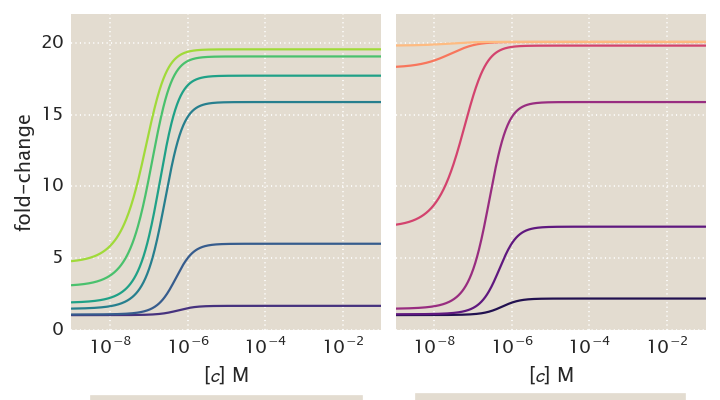

In [5]:
# Define parameters.


c_range = np.logspace(-9, -1, 500)
A_range = [1, 10, 100, 200, 500, 1000]
ep_aa_range = [-8, -10, -12, -15, -18, -20]
ep_ai = 5
ep_pa = -3 
k_a = 50E-9
k_i = 200E-6

# Set the colors
viridis = sns.color_palette('viridis', n_colors=6)
magma = sns.color_palette('magma', n_colors=6)

# Instantiate the figure
fig, ax = plt.subplots(1, 2, figsize=(9, 5), sharey=True)

# Compute the corepression with varying R
for i, A in enumerate(A_range):
    fold_change = coactivation(c_range, A, ep_aa_range[2], ep_ai, ep_pa, k_a, k_i)
    ax[0].plot(c_range, fold_change, '-', color=viridis[i], label=A) 
leg0 = ax[0].legend(bbox_to_anchor=(0.5, -.185), loc='upper center', title='activators / cell', ncol=3)
leg0.get_title().set_fontsize(15)
# Compute the corepression with varying ep_ra
for i, ep in enumerate(ep_aa_range):
    fold_change = coactivation(c_range, A_range[2], ep, ep_ai, ep_pa, k_a, k_i)
    ax[1].plot(c_range, fold_change, '-', color=magma[i], label=ep)
    
leg1 = ax[1].legend(bbox_to_anchor=(0.5,-.18), loc='upper center',
                      title=r'$\Delta\varepsilon_{A}\,(k_BT)$', ncol=3)
leg1.get_title().set_fontsize(15)
ax[0].set_xlabel('[$c$] M')
ax[1].set_xlabel('[$c$] M')
ax[0].set_ylabel('fold-change')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylim([0,22])
ax[1].set_ylim([0,22])
ax[0].set_xticks([1E-8, 1E-6, 1E-4, 1E-2])
ax[1].set_xticks([1E-8, 1E-6, 1E-4, 1E-2])
ax[0].tick_params(labelsize=17)
ax[1].tick_params(labelsize=17)

plt.tight_layout()
plt.savefig('/Users/gchure/Dropbox/mwc_induction/Figures/supplementary_figures/activation_predictions.pdf', bbox_inches='tight')


## Plot all cases together in a big fat plot. 

In [6]:
def induction(c, R, ep_ra, ep_ai, k_a, k_i, n_ns=4.6E6):
    mwc_term = (1 + c / k_a)**2 / (np.exp(-ep_ai) *\
                (1 + c / k_i)**2 + (1 + c / k_a)**2)
    repression = (1 + mwc_term * (R / n_ns) * np.exp(-ep_ra))
    return 1 / repression

def corepression(c, R, ep_ra, ep_ai, k_a, k_i, n_ns=4.6E6):
    mwc_term = ((1 + c / k_a)**2) / ((1 + c / k_a)**2 + np.exp(ep_ai)*(1 + c / k_i)**2)
    repression = (1 + mwc_term * (R / n_ns) * np.exp(-ep_ra))
    return 1 / repression

def coactivation(c, A, ep_aa, ep_ai, ep_pa, k_a, k_i, n_ns=4.6E6):
    mwc_term = (np.exp(-ep_ai) * (1 + c / k_a)**2) / (np.exp(-ep_ai) * (1 + \
                c / k_a)**2 + (1 + c / k_i)**2)
    denominator = 1 + mwc_term * (A / n_ns) * np.exp(-ep_aa)
    numerator = 1 + mwc_term * (A / n_ns) * np.exp(-ep_aa) * np.exp(-ep_pa)
    return numerator / denominator

def activation(c, A, ep_aa, ep_ai, ep_pa, k_a, k_i, n_ns=4.6E6):
    mwc_term = (1 + c / k_a)**2 / (np.exp(-ep_ai) * (1 + \
                c / k_i)**2 + (1 + c / k_a)**2)
    denominator = 1 + mwc_term * (A / n_ns) * np.exp(-ep_aa)
    numerator = 1 + mwc_term * (A / n_ns) * np.exp(-ep_aa) * np.exp(-ep_pa)
    return numerator / denominator

<IPython.core.display.Javascript object>


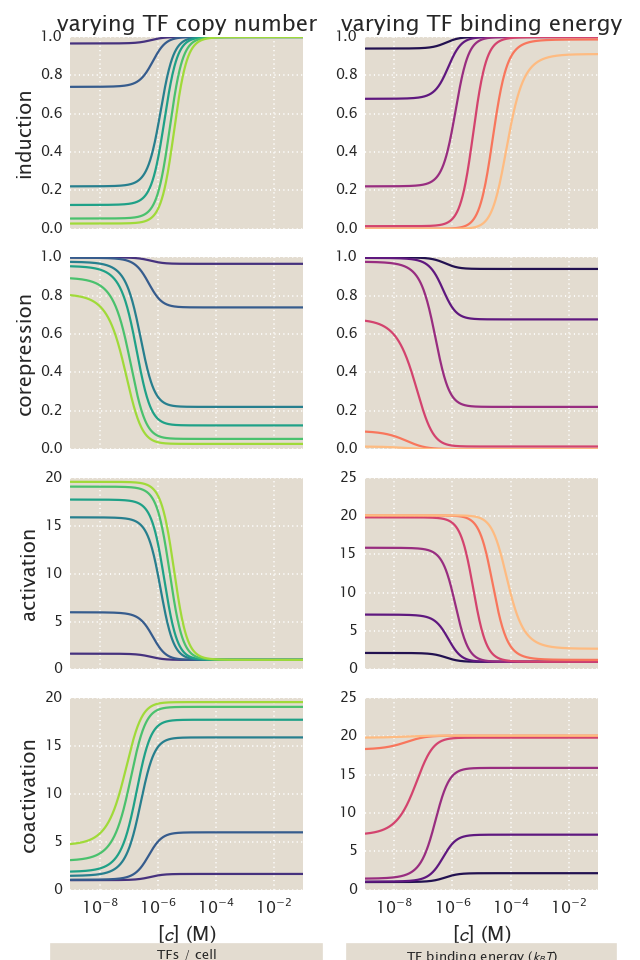

In [7]:
# Define parameters.
c_range = np.logspace(-9, -1, 500)
R_range = [1, 10, 100, 200, 500, 1000]
A_range = [1, 10, 100, 200, 500, 1000]
ep_ra_range = [-8, -10, -12, -15, -18, -20]
ep_aa_range = [-8, -10, -12, -15, -18, -20]
ep_ai = 5
ep_ap = 3
k_a = 200E-6
k_a_co = 50E-9
k_i = 50E-9
k_i_co = 200E-6

# Set the colors
viridis = sns.color_palette('viridis', n_colors=6)
magma = sns.color_palette('magma', n_colors=6)

# Instantiate the figure
fig, ax = plt.subplots(4, 2, figsize=(8, 12), sharex=True)

ax = ax.ravel()
# Compute the corepression with varying R
for i, R in enumerate(R_range):
    fold_change = induction(c_range, R, ep_ra_range[2], ep_ai, k_a, k_i)
    ax[0].plot(c_range, fold_change, '-', color=viridis[i], label=R)
    
ax[0].set_ylabel('induction')
ax[0].set_title('varying TF copy number')
ax[1].set_title('varying TF binding energy')

# Compute the corepression with varying ep_ra
for i, ep in enumerate(ep_ra_range):
    fold_change = induction(c_range, R_range[2], ep, ep_ai, k_a, k_i)
    ax[1].plot(c_range, fold_change, '-', color=magma[i], label=ep)
    

# Compute the corepression with varying R
for i, R in enumerate(R_range):
    fold_change = corepression(c_range, R, ep_ra_range[2], ep_ai, k_a_co, k_i_co)
    ax[2].plot(c_range, fold_change, '-', color=viridis[i], label=R)
    
ax[2].set_ylabel('corepression')

# Compute the corepression with varying ep_ra
for i, ep in enumerate(ep_ra_range):
    fold_change = corepression(c_range, R_range[2], ep, ep_ai, k_a_co, k_i_co)
    ax[3].plot(c_range, fold_change, '-', color=magma[i], label=ep)
    

# Activation
for i, A in enumerate(A_range):
    fold_change = activation(c_range, A, ep_aa_range[2], ep_ai, ep_pa, k_a, k_i)
    ax[4].plot(c_range, fold_change, '-', color=viridis[i], label=A) 
ax[4].set_ylabel('activation')

# Compute the corepression with varying ep_ra
for i, ep in enumerate(ep_aa_range):
    fold_change = activation(c_range, A_range[2], ep, ep_ai, ep_pa, k_a, k_i)
    ax[5].plot(c_range, fold_change, '-', color=magma[i], label=ep)

for i, A in enumerate(A_range):
    fold_change = coactivation(c_range, A, ep_aa_range[2], ep_ai, ep_pa, k_a_co, k_i_co)
    ax[6].plot(c_range, fold_change, '-', color=viridis[i], label=A) 
ax[6].set_ylabel('coactivation')

# Compute the corepression with varying ep_ra
for i, ep in enumerate(ep_aa_range):
    fold_change = coactivation(c_range, A_range[2], ep, ep_ai, ep_pa, k_a_co, k_i_co)
    ax[7].plot(c_range, fold_change, '-', color=magma[i], label=ep)   

ax[6].set_xlabel('[$c$] (M)')
ax[7].set_xlabel('[$c$] (M)')
    
for a in ax:
    a.set_xscale('log')
    a.set_xscale('log')
    a.set_xticks([1E-8, 1E-6, 1E-4, 1E-2])
    a.set_xticks([1E-8, 1E-6, 1E-4, 1E-2])
    
plt.tight_layout()
ax[6].legend(bbox_to_anchor=(0.5, -.24), loc='upper center', title='TFs / cell', ncol=3)
ax[7].legend(bbox_to_anchor=(0.5,-.24), loc='upper center',
                      title=r'TF binding energy ($k_BT$)', ncol=3)
plt.savefig('/Users/gchure/Desktop/all_cases.pdf', bbox_inches='tight')

## Activation repression circuit 

In [8]:
def circuit(c_r, c_a, R, A, ka_r, ki_r, ka_a, ki_a, ep_r, ep_a, ep_ai_a, ep_ai_r,
            ep_ap, nns=4.6E6):
    pa_a = (1 + c_a / ka_a)**2 / ((1 + c_a/ka_a)**2 + np.exp(ep_ai_a) * (1 + c_a / ki_a)**2)
    pa_r = (1 + c_r / ka_r)**2 / ((1 + c_r/ka_r)**2 + np.exp(-ep_ai_r) * (1 + c_r / ki_r)**2)
    
    numerator = 1 + pa_a * (A / nns)*np.exp(-(ep_a + ep_ap))
    denominator = 1 + pa_a * (A / nns) * np.exp(-ep_a) +\
                 pa_r * (R / nns) * np.exp(-ep_r) +\
                 pa_r * pa_a * (A / nns) * (R / nns) * np.exp(-(ep_a + ep_r))
            
    return numerator / denominator 

In [59]:
# Define the parameters
R = 100 
A = 100 
ep_r = -13
ep_a = -10
ep_ai_a = 7
ep_ai_r = 7
ep_ap = -3.9
ka_a = 100E-9
ki_a = 500E-6
ka_r = 500E-6
ki_r = 100E-9

c_r = np.logspace(-9, -1, 500)
c_a = np.logspace(-9, -1, 500)
CR, CA = np.meshgrid(c_r, c_a)

In [60]:
fc = circuit(CR, CA, R, A, ka_r, ki_r, ka_a, ki_a, ep_r, ep_a, ep_ai_a,ep_ai_r, ep_ap)

<IPython.core.display.Javascript object>


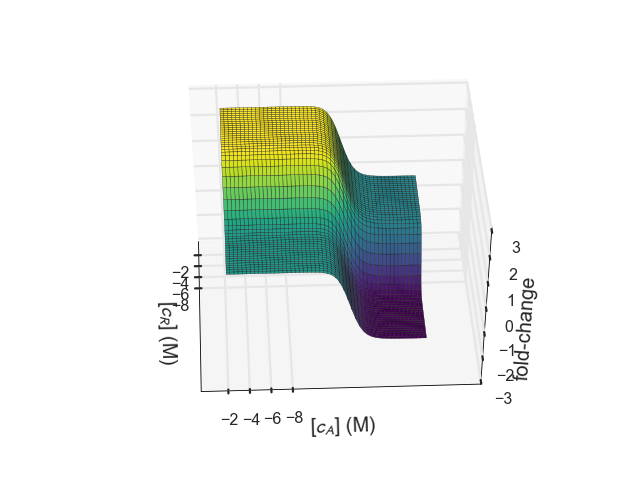

In [64]:
with sns.axes_style('white'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(np.log(CR), np.log(CA), np.log(fc), cmap=plt.cm.viridis)
    ax.set_xlabel(r'[$c_R$] (M)')
    ax.set_ylabel(r'[$c_A$] (M)')
    ax.set_zlabel(r'fold-change')
    ax.set_xticks([-8, -6, -4, -2])
    ax.set_yticks([-8, -6, -4, -2])
